In [1]:
from openfermion.ops import QubitOperator
import numpy as np
import cirq

## State_Prep function
- generates a quantum circuit to prepare HF state given as a list of qubit occupations

In [2]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import State_Prep

In [3]:
HF_state = [1,1,0,0]

initial_state = State_Prep(HF_state)

print(cirq.Circuit((initial_state(*cirq.LineQubit.range(initial_state.num_qubits())))))
print('############')
print(
    cirq.Circuit(cirq.decompose_once((initial_state(*cirq.LineQubit.range(initial_state.num_qubits()))))))

0: ───state_prep: |1> ───
      │
1: ───state_prep: |1> ───
      │
2: ───state_prep: |0> ───
      │
3: ───state_prep: |0> ───
############
0: ───X───

1: ───X───

2: ───I───

3: ───I───


# Exponentiated  PauliWord

In order to perfrom the following ciruict:

$$U = e^{-i \theta X_{0} Z_{1} Y_{2} X_{3}}$$

the following circuit is employed:


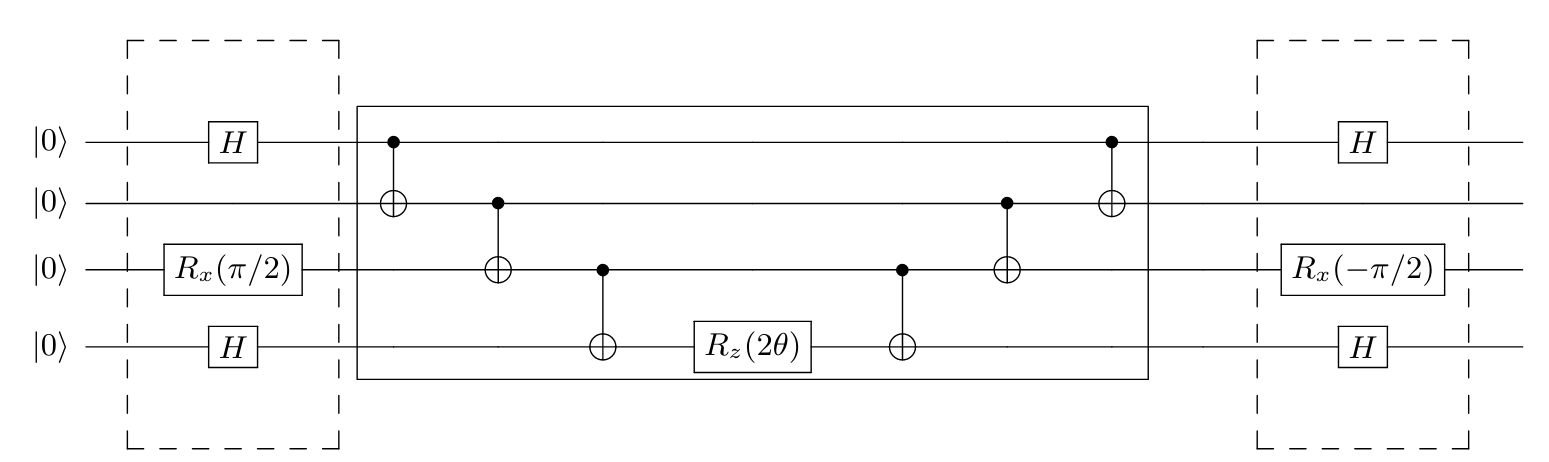

In [4]:
import os
parent_dir = os.path.abspath('..')
# os.listdir(parent_dir) # lists directory
picture_folder = os.path.join(parent_dir, 'pictures')
# os.listdir(picture_folder) # lists directory
pic = os.path.join(picture_folder, 'exponentiated_pauliword.png')


from IPython.display import Image
Image(pic)


- first a change of basis is employed
meaning the new operator to perform is : $e^{-i \theta Z_{0} Z_{1} Z_{2} Z_{3}}$
- This is achieved by the cascade circuit as shown above
- finally change of basis is undone!
resutling in the desired exponentiated pauliword being performed

### basis change initial class

In [5]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import Change_of_Basis_initial

In [6]:
x = QubitOperator('X0 Z2 Y3', 0.5j)
Change_of_Basis_initial_circ_obj = Change_of_Basis_initial(x)

# print(cirq.Circuit((Change_of_Basis_initial_circ_obj(*cirq.LineQubit.range(Change_of_Basis_initial_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((Change_of_Basis_initial_circ_obj(*cirq.LineQubit.range(Change_of_Basis_initial_circ_obj.num_qubits()))))))

0: ───H──────────

3: ───Rx(0.5π)───


### entangle initial class

In [7]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import Engtangle_initial

In [8]:
x = QubitOperator('X0 Z2 Y3', 0.5j)
entangle_initial_circ_obj = Engtangle_initial(x)

# print(cirq.Circuit((entangle_initial_circ_obj(*cirq.LineQubit.range(entangle_initial_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((entangle_initial_circ_obj(*cirq.LineQubit.range(entangle_initial_circ_obj.num_qubits()))))))

0: ───@───────
      │
2: ───X───@───
          │
3: ───────X───


### rotation class

In [9]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import PauliWord_exponential_rotation

In [10]:
x = QubitOperator('X0 Z2 Y3', -0.125j)
theta = np.pi
PauliWord_exponential_rotation_obj = PauliWord_exponential_rotation(x, theta)
# print(cirq.Circuit((PauliWord_exponential_rotation_obj(*cirq.LineQubit.range(PauliWord_exponential_rotation_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((PauliWord_exponential_rotation_obj(*cirq.LineQubit.range(PauliWord_exponential_rotation_obj.num_qubits()))))))

3: ───Rz(0.25π)───


### entangle final class

In [11]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import Engtangle_final

In [12]:
x = QubitOperator('X0 Z2 Y3', 0.5)
entangle_final_circ_obj = Engtangle_final(x)

# print(cirq.Circuit((entangle_final_circ_obj(*cirq.LineQubit.range(entangle_final_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((entangle_final_circ_obj(*cirq.LineQubit.range(entangle_final_circ_obj.num_qubits()))))))

0: ───────@───
          │
2: ───@───X───
      │
3: ───X───────


### basis change FINAL class

In [13]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import Change_of_Basis_final

In [14]:
x = QubitOperator('X0 Z2 Y3', 0.5j)
Change_of_Basis_final_circ_obj = Change_of_Basis_final(x)

# print(cirq.Circuit((Change_of_Basis_final_circ_obj(*cirq.LineQubit.range(Change_of_Basis_final_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((Change_of_Basis_final_circ_obj(*cirq.LineQubit.range(Change_of_Basis_final_circ_obj.num_qubits()))))))

0: ───H───────────

3: ───Rx(-0.5π)───


### FULL exponentiated pauliword

In [15]:
from quchem.Qcircuit.Ansatz_quantum_circuit_functions import full_exponentiated_PauliWord_circuit

In [16]:
x = QubitOperator('X0 Z2 Y3', 0.25j)
theta = np.pi
full_exp_circ_obj = full_exponentiated_PauliWord_circuit(x, theta)
full_exp_circ_obj.num_qubits()
# print(cirq.Circuit((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits())))))
# print('####')
print(
    cirq.Circuit(cirq.decompose_once((full_exp_circ_obj(*cirq.LineQubit.range(full_exp_circ_obj.num_qubits()))))))

0: ───H──────────@───────────────────────@───────────H───
                 │                       │
2: ──────────────X───@───────────────@───X───────────────
                     │               │
3: ───Rx(0.5π)───────X───Rz(-0.5π)───X───Rx(-0.5π)───────


/////////////////////////////////////////////////////////////